<h1>Churn: Is there a point of no return for customers?</h1>

<div id='Contents' name='Contents'><br></div>

<h2>Contents</h2>

<ul>
    <li><a href='#Brief'>Brief</a></li>
    <li><a href='#Data_exploration'>Data exploration</a></li>
    <li><a href='#Methodology'>Methodology</a></li>
    <li><a href='#Analysis'>Analysis</a></li>
    <ul>
        <li><a href='#Assessing_the_model'>Assessing the model</a></li>
        <li><a href='#Predictions'>Predictions</a></li>
    </ul>
    <li><a href='#Insights'>Insights</a></li>
</ul>

<div id='Brief' name='Brief'><br></div>

<hr>

<br>

<h3><a href='#Contents'>Brief</a></h3>

<ul>
    <li><b><code></code></b> - </li>
    <br>
    <li><b><code></code></b> - </li>
    <br>
    <li><b><code></code></b> - </li>
</ul>

<div id='Data_exploration' name='Data_exploration'><br></div>

<hr>

<br>

<h2><a href='#Contents'>Data exploration</a></h2>

<br>

<h3><font color='grey'>Exploring the data</font></h3>

<p>Churn is a <code>binary outcome</code>. Our customers either have or have not churned, as indicated by the presence of a 1 or 0. Therefore, our model has to predict this binary outcome based on a customer's recency, i.e. how does a customer's <code>time_since_last_purchase</code> impact whether or not a customer returns a <code>has_churned</code> value of 1? To answer this question, we use <code>logistic regression</code>, a method that differs from linear regression in a straightforward way - instead of building a line of best fit to minimise the residuals, we fit a line to maximise the likelihood (<code>maximum_likelihood</code>) of observing a True outcome. Good explanatory variables will produce an "S-curve".</p>

In [65]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# style
!pip install ipynb | grep -v 'already satisfied'
from ipynb.fs.full.Style_Sheet import *
plt.style.use(style_use)
plt.rcParams.update(style_params)

# data
file_path = r'churn.csv'
df = pd.read_csv(file_path)

# show
df.head(10)

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,0.184549,0.149345
1,0,2.456753,1.420000
2,0,0.427614,0.443084
3,0,1.360712,0.334995
4,0,0.107128,0.198026
5,0,1.767170,0.100663
6,0,0.970458,0.073435
7,0,1.479993,1.260000
8,0,1.403923,1.450000
9,0,1.673095,0.354797


<br>

<h3><font color='grey'>What early trends can we identify?</font></h3>

<p>Churn is a <code>binary outcome</code>. Our customers either have or have not churned, as indicated by the presence of a 1 or 0. Therefore, our model has to predict this binary outcome based on a customer's recency, i.e. how does a customer's <code>time_since_last_purchase</code> impact whether or not a customer returns a <code>has_churned</code> value of 1? To answer this question, we use <code>logistic regression</code>, a method that differs from linear regression in a straightforward way - instead of building a line of best fit to minimise the residuals, we fit a line to maximise the likelihood (<code>maximum_likelihood</code>) of observing a True outcome. Good explanatory variables will produce an "S-curve".</p>

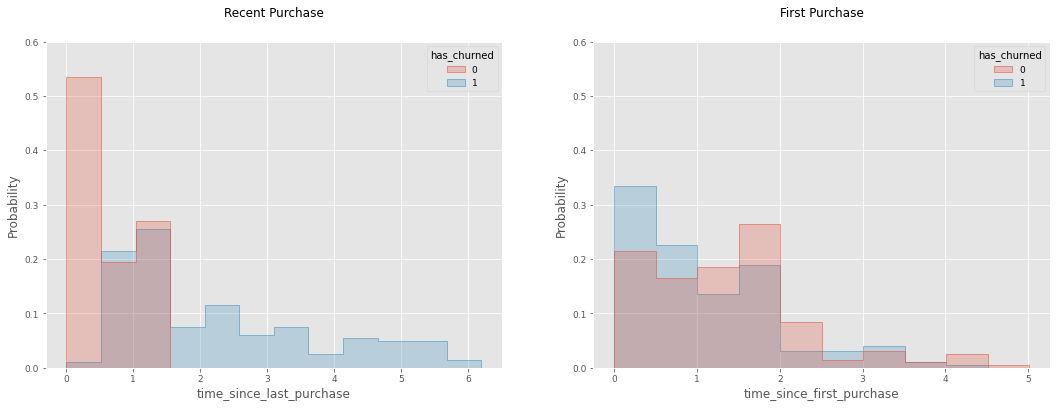

In [68]:
# hist plot
def viz_hist(data, x, kde, ax, title):
    
    # sort bins
    x_min = round(min(data[x]),0)
    x_max = round(max(data[x]),0)
    bins_n = int((x_max - x_min) * 2)
    
    # plot
    sns.histplot(data=data, x=x, kde=kde, ax=ax,
                 hue='has_churned', stat='probability',
                 common_norm=False, element='step', bins=bins_n)
    ax.set_title(title)
    ax.set_ylim(0, 0.6)
    
    # return
    return ax

# dashboard
fig, [ax_1, ax_2] = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

# viz
viz_hist(df, 'time_since_last_purchase', False, ax_1, 'Recent Purchase')
viz_hist(df, 'time_since_first_purchase', False, ax_2, 'First Purchase')

# show
plt.show()

 <div id='Methodology' name='Methodology'><br></div>

<hr>

<br>

<h2><a href='#Contents'>Methodology</a></h2>

<br>

<h3><font color='grey'>Why do we use logistic regression?</font></h3>

<p>Churn is a <code>binary outcome</code>. Our customers either have or have not churned, as indicated by the presence of a 1 or 0. Therefore, our model has to predict this binary outcome based on a customer's recency, i.e. how does a customer's <code>time_since_last_purchase</code> impact whether or not a customer returns a <code>has_churned</code> value of 1? To answer this question, we use <code>logistic regression</code>, a method that differs from linear regression in a straightforward way - instead of building a line of best fit to minimise the residuals, we fit a line to maximise the likelihood (<code>maximum_likelihood</code>) of observing a True outcome. Good explanatory variables will produce an "S-curve".</p>

In [45]:
from statsmodels.formula.api import logit
from statsmodels.graphics.mosaicplot import mosaic

# log reg function
def reg_log(y, x, data):
    
    # variables
    mdl_v = f'{y} ~ {x}'
    
    # model
    mdl = logit(mdl_v, data=data).fit(disp=0)
    
    # params
    mdl_params = mdl.params
    mdl_intercept = mdl_params[0]
    mdl_slope = mdl_params[1]
    mdl_eq = f'{y} = {mdl_intercept} + {mdl_slope} * {x}'
    
    # predictions
    data['mdl_prediction'] = mdl.predict(data[x])
    data['mdl_prediction_outcome'] = np.round(mdl.predict(data[x]))
    
    # fit
    mdl_conf_matrix = mdl.pred_table()
    mdl_accuracy = (mdl_conf_matrix[0,0] + mdl_conf_matrix[1,1]) / len(data)
    mdl_sensitivity = mdl_conf_matrix[1,1] / (mdl_conf_matrix[1,0] + mdl_conf_matrix[1,1])
    mdl_specificity = mdl_conf_matrix[0,0] / (mdl_conf_matrix[0,0] + mdl_conf_matrix[0,1])
    mdl_fit = pd.DataFrame({'Fit':['Accuracy','Sensitivity','Specificity'],
                            'Score':[mdl_accuracy, mdl_sensitivity, mdl_specificity]})
    
    # output
    return data, mdl, mdl_params, mdl_eq, mdl_conf_matrix, mdl_fit

<br>

<h3><font color='grey'>Building logistic regression using <code>statsmodels</code></font></h3>

<p>We use the <code>statsmodel</code> package to build logistic regression. This is the preferred package for extracting insights from historical data which can be used to help make decisions (alternatively, <code>scikit-learn</code> is available for logistic regression exercises when optimising for machine learnning).</p>

<br>

<p>The <code>logit</code> function builds the model according to the variables statement of <i>y ~ x</i> or <i>response ~ explanatory</i>. This model stores the parameters to explain the relationship between <code>has_churned</code> and <code>time_since_last_purchase</code>, which can be used to produce a probability of churn based on future values. In this case, we call <code>.predict</code> on the origial data to see what outcome our model would have expected based on the observed relationship. This results in the following fields:</p>

<ul>
    <li><b><code>has_churned</code></b> - An indicator of customer's actual outcome.</li>
    <li><b><code>mdl_prediction</code></b> - A predicted probability of churn, based on the overall relationship.</li>
    <li><b><code>mdl_prediction_outcome</code></b> - A prediction of the most likely outcome.</li>
</ul>

In [46]:
# inputs
data = df
y = 'has_churned'
y_prediction = 'mdl_prediction_outcome'
x = 'time_since_last_purchase'

# run model
mdl_output = reg_log(y, x, data)

# store outputs
mdl_df = mdl_output[0]
mdl = mdl_output[1]

# show
mdl_df.head(10)

,has_churned,time_since_first_purchase,time_since_last_purchase,mdl_prediction,mdl_prediction_outcome
0,0,0.184549,0.149345,0.068584,0.0
1,0,2.456753,1.420000,0.696102,1.0
2,0,0.427614,0.443084,0.140155,0.0
3,0,1.360712,0.334995,0.108475,0.0
4,0,0.107128,0.198026,0.077490,0.0
5,0,1.767170,0.100663,0.060635,0.0
6,0,0.970458,0.073435,0.056572,0.0
7,0,1.479993,1.260000,0.597717,1.0
8,0,1.403923,1.450000,0.712992,1.0
9,0,1.673095,0.354797,0.113766,0.0


<br>

<h3><font color='grey'>The "S-curve"</font></h3>

<p>A <code>confusion matrix</code> is stored to assess the accuracy of our model by pinpointing the percentage of correct predictions. Since we have actuals (<code>has_churned</code>) and predictions (<code>mdl_prediction_outcome</code>), we can identify <code>False-Positives</code> (how many 0s were incorrectly predicted as 1) and <code>True-Negatives</code> (how many 0s were incorrectly predicted as 1). We use model <code>sensitivity</code> and <code>specificity</code> to describe the accuracy of the 1 and 0 populations, respectively.</p>

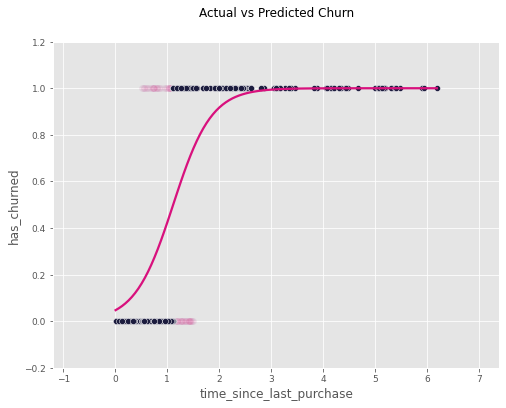

In [62]:
# log reg plot
def viz_reg_log(data, y, x, ax, title):
    sns.regplot(ax=ax, data=data, x=x, y=y, ci=None, logistic=True, color=color[0], scatter_kws={'alpha':0.025})
    ax.set_xlim(round(min(data[x]) - (max(data[x])/5),1), round(max(data[x]) + (max(data[x])/5),1))
    ax.set_ylim(round(min(data[y]) - (max(data[y])/5),1), round(max(data[y]) + (max(data[y])/5),1))   
    ax.set_title(title)
    return ax

# viz scatter
def viz_scatter(data, y, x, ax):
    sns.scatterplot(data=data, y=y, x=x, ax=ax, color=color[1])
    ax.set_xlim(round(min(data[x]) - (max(data[x])/5),1), round(max(data[x]) + (max(data[x])/5),1))
    ax.set_ylim(round(min(data[y]) - (max(data[y])/5),1), round(max(data[y]) + (max(data[y])/5),1))   
    return ax

# fig
fig, ax_1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

# viz
viz_reg_log(data, y, x, ax_1, 'Actual vs Predicted Churn')
viz_scatter(data, y_prediction, x, ax_1)

# show
plt.show()

<br>

<h3><font color='grey'>Confusion matrix</font></h3>

<p>A <code>confusion matrix</code> is stored to assess the accuracy of our model by pinpointing the percentage of correct predictions. Since we have actuals (<code>has_churned</code>) and predictions (<code>mdl_prediction_outcome</code>), we can identify <code>False-Positives</code> (how many 0s were incorrectly predicted as 1) and <code>True-Negatives</code> (how many 0s were incorrectly predicted as 1). We use model <code>sensitivity</code> and <code>specificity</code> to describe the accuracy of the 1 and 0 populations, respectively.</p>

           Fit   Score
0     Accuracy  0.7575
1  Sensitivity  0.7350
2  Specificity  0.7800


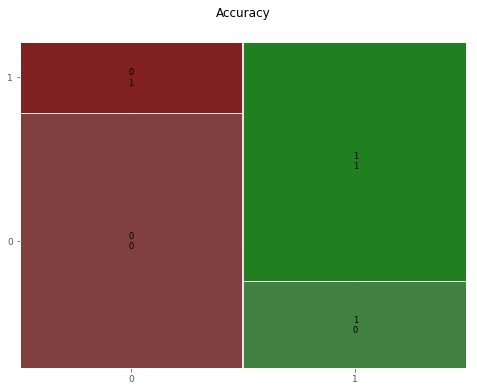

In [9]:
# confusion matrix
mdl_conf_matrix = mdl_output[4]
mdl_fit = mdl_output[5]

# fig
fig, ax_1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

# viz
mosaic(mdl_conf_matrix, ax=ax_1, title='Accuracy')

# show
print(mdl_fit)
plt.show()

<div id='Analysis' name='Analysis'><br></div>

<hr>

<br>

<h3><a href='#Contents'>Analysis</a></h3>

<ul>
    <li><b><code></code></b> - </li>
    <br>
    <li><b><code></code></b> - </li>
    <br>
    <li><b><code></code></b> - </li>
</ul>

<div id='Assessing_the_model' name='Assessing_the_model'><br></div>

<hr>

<br>

<h3><a href='#Contents'>Assessing the model</a></h3>

<ul>
    <li><code>accuracy</code>: % of correct predictions.</li>
    <li><code>sensitivity</code>: % of actual True population predicted correctly.</li>
    <li><code>specificity</code>: % of actual False population predicted correctly.</li>
</ul>

           Fit   Score
0     Accuracy  0.7575
1  Sensitivity  0.7350
2  Specificity  0.7800


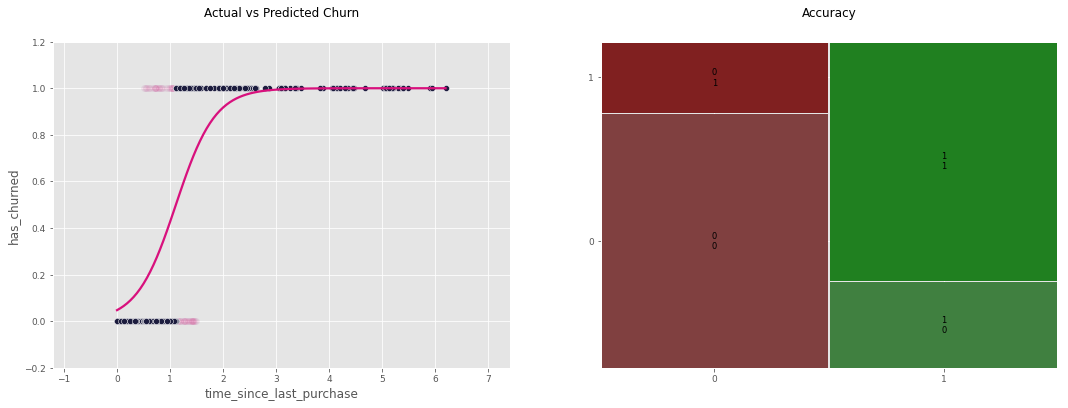

In [8]:
# confusion matrix
mdl_conf_matrix = mdl_output[4]
mdl_fit = mdl_output[5]

# fig
fig, [ax_1, ax_2] = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# viz
viz_reg_log(data, y, x, ax_1, 'Actual vs Predicted Churn')
viz_scatter(data, y_prediction, x, ax_1)
mosaic(mdl_conf_matrix, ax=ax_2, title='Accuracy')

# show
print(mdl_fit)
plt.show()

<div id='Predictions' name='Predictions'><br></div>

<hr>

<br>

<h3><a href='#Contents'>Predictions</a></h3>

<ul>
    <li><code>mdl.predict</code>: % chance of churn based on model.</li>
    <li><code>most_likely_outcome</code>: rounds predicted value to 0 or 1.</li>
    <li><code>odds_ratio</code>: probability of churn vs probability of non-churn (<code>prediction/(1-prediction)</code>).</li>
</ul>

In [90]:
# sample data
df_predictions = pd.DataFrame({'time_since_last_purchase':np.arange(0, 7, 0.25)})

# most liekly outcome
df_predictions['has_churned'] = mdl.predict(df_predictions['time_since_last_purchase'])
df_predictions['most_likely_outcome'] = round(mdl.predict(df_predictions['time_since_last_purchase']))

# odds ratio
df_predictions['odds_ratio'] = df_predictions['has_churned'] / (1 - df_predictions['has_churned'])
df_predictions['odds_ratio_log'] = np.log(df_predictions['odds_ratio'])

# show
df_predictions.head()

,time_since_last_purchase,has_churned,most_likely_outcome,odds_ratio,odds_ratio_log
0,0.00,0.046857,0.0,0.049161,-3.012657
1,0.25,0.088157,0.0,0.096681,-2.336343
2,0.50,0.159758,0.0,0.190133,-1.660030
3,0.75,0.272155,0.0,0.373919,-0.983716
4,1.00,0.423749,0.0,0.735354,-0.307403


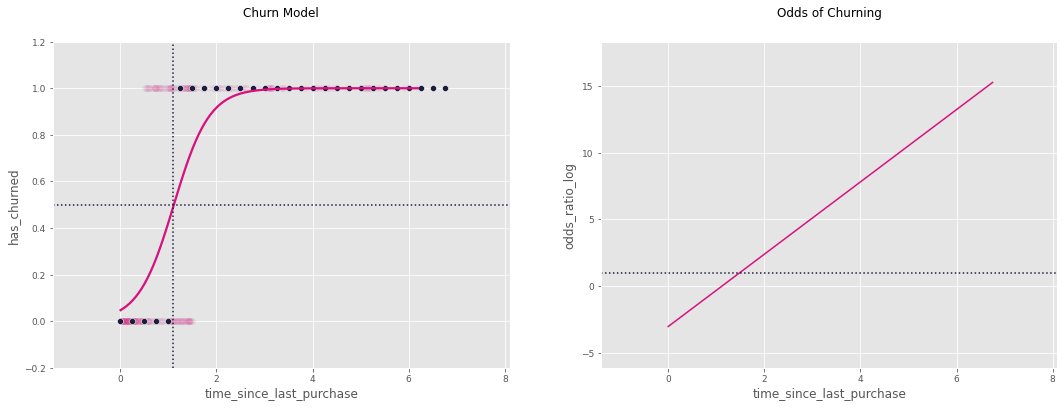

In [94]:
# line plot
def viz_line(data, y, x, ax, title):
    sns.lineplot(data=data, y=y, x=x, ax=ax, color=color[0])
    ax.set_xlim(round(min(data[x]) - (max(data[x])/5),1), round(max(data[x]) + (max(data[x])/5),1))
    ax.set_ylim(round(min(data[y]) - (max(data[y])/5),1), round(max(data[y]) + (max(data[y])/5),1))
    ax.set_title(title)
    return ax

# fig
fig, [ax_1, ax_2] = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# viz
viz_reg_log(df, 'has_churned', 'time_since_last_purchase', ax_1, 'Churn Model')
viz_scatter(df_predictions, 'most_likely_outcome', 'time_since_last_purchase', ax_1)
ax_1.axvline(x=1.1, linestyle='dotted', color=color[1])
ax_1.axhline(y=0.5, linestyle='dotted', color=color[1])
viz_line(df_predictions, 'odds_ratio_log', 'time_since_last_purchase', ax_2, 'Odds of Churning')
ax_2.axhline(y=1, linestyle='dotted', color=color[1])

# show
plt.show()

<div id='Insights' name='Insights'><br></div>

<hr>

<br>

<h3><a href='#Contents'>Insights</a></h3>

<ul>
    <li>Recency can predict churn with <code>~60% accuracy</code>. This is a good starting point to understand behaviour, but more data points will be beneficial.</li>
    <br>
    <li>Customers with <code>time_since_last_purchase > 0</code>  are at risk of churn - need to discourage customers from reaching this point.</li>
    <br>
    <li><code>Odds curve</code> is exponetial, i.e. every additional day of idleness adds increased risk of churn (customers with longer idle times are up to <code>x5 more likely to churn</code> and are difficult to re-engage).</li>
</ul>